In [131]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [132]:
#Printing the Dataset
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [133]:
false = data[data['Class'] == 1]
true = data[data['Class'] == 0]
n = len(false)/float(len(true))
print('Fraud Transactions:',n)

print('False Detection Cases: {}'.format(len(data[data['Class'] == 1])))
print('True Detection Cases: {}'.format(len(data[data['Class'] == 0])),"\n")

Fraud Transactions: 0.0017304750013189597
False Detection Cases: 492
True Detection Cases: 284315 



Text(0.5, 0, 'Class')

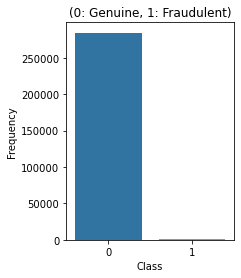

In [134]:
import seaborn as sns
count_classes = pd.value_counts(data['Class'], sort = True).sort_index()

plt.figure(figsize=(3,4))
sns.barplot(x=count_classes.index, y=count_classes)
plt.title('(0: Genuine, 1: Fraudulent)')
plt.ylabel('Frequency')
plt.xlabel('Class')

In [135]:
from sklearn.preprocessing import StandardScaler
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Time','Amount'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [136]:
# 2. Assigning Dependent and Independent variable

X = data.loc[:, data.columns != 'Class']
y = data.loc[:, data.columns == 'Class']

In [137]:
#Undersampling

# Data points in the minority class
number_records_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)

# Pick indices of the normal classes
normal_indices = data[data.Class == 0].index

random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Undersampled dataset
under_sample_data = data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.loc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.loc[:, under_sample_data.columns == 'Class']

# Showing ratio
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  984


In [138]:
# Splitting data into train and test set.

from sklearn.model_selection import train_test_split

# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

# Undersampled dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                  ,test_size = 0.2
                                                                                                   ,random_state = 0)

print(" ")
print("Undersampled Data:")
print("Number transactions train dataset: ", len(X_train_undersample))
print("Number transactions test dataset: ", len(X_test_undersample))
print("Total number of transactions: ", len(X_train_undersample)+len(X_test_undersample))


Number transactions train dataset:  199364
Number transactions test dataset:  85443
Total number of transactions:  284807
 
Undersampled Data:
Number transactions train dataset:  787
Number transactions test dataset:  197
Total number of transactions:  984


Text(0.5, 0, 'Class')

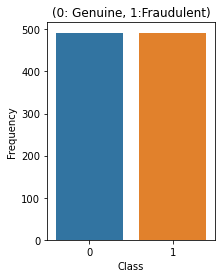

In [139]:
import seaborn as sns
count_classes = pd.value_counts(under_sample_data['Class'], sort = True).sort_index()
'''count_classes.plot(kind = 'bar',color = 'grey')'''

plt.figure(figsize=(3,4))
sns.barplot(x=count_classes.index, y=count_classes)
plt.title('(0: Genuine, 1:Fraudulent)')
plt.ylabel('Frequency')
plt.xlabel('Class')

In [140]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

In [141]:
param_grid = {'C' : [0.01 , 0.1 , 1 , 10 , 100],'max_iter': [1000,4000,7000,8000]}
grid = GridSearchCV(LogisticRegression(),param_grid ,n_jobs=+1,cv=3)
grid.fit(X_train_undersample,y_train_undersample.values.ravel())

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [1000, 4000, 7000, 8000]})

In [142]:
grid.best_estimator_

LogisticRegression(C=1, max_iter=1000)

In [143]:
y_pred_undersample_log = grid.predict(X_test_undersample)
print('Accuracy Score',accuracy_score(y_test_undersample,y_pred_undersample_log))

Accuracy Score 0.9187817258883249


In [144]:
# Create a function to plot a fancy confusion matrix

import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

The accuracy score  of logistic regression for undersample data is 0.9187817258883249


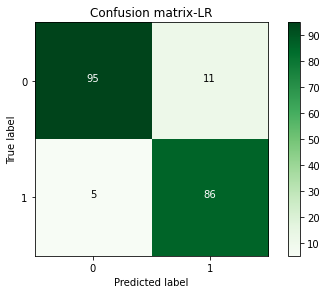

In [145]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample_log)
np.set_printoptions(precision=2)

print('The accuracy score  of logistic regression for undersample data is {}'.format(accuracy_score(y_test_undersample,y_pred_undersample_log)))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix-LR')
plt.show()

In [146]:
from sklearn.metrics import recall_score,f1_score,precision_score,classification_report,matthews_corrcoef



print('The accuracy of Logistic regression is {}'.format(accuracy_score(y_test_undersample, y_pred_undersample_log)))
print(" ")
print('Precision-->{}'.format(precision_score(y_test_undersample, y_pred_undersample_log)))
print(" ")
print('F_1_Score -->{}'.format(f1_score(y_test_undersample, y_pred_undersample_log)))
print(" ")
print('recall_Score -->{}'.format(recall_score(y_test_undersample, y_pred_undersample_log)))
print(" ")
print('matthews_corrcoef -->{}'.format(matthews_corrcoef(y_test_undersample, y_pred_undersample_log)))



The accuracy of Logistic regression is 0.9187817258883249
 
Precision-->0.8865979381443299
 
F_1_Score -->0.9148936170212766
 
recall_Score -->0.945054945054945
 
matthews_corrcoef -->0.8389363809611246


The accuracy of logistic regression is 0.9620331683110378


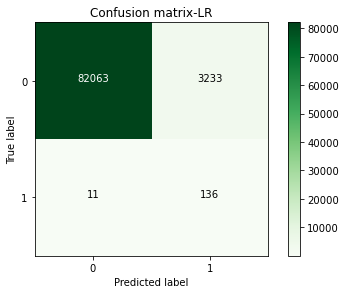

In [147]:
#On Whole Data
y_pred_log = grid.predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred_log)
np.set_printoptions(precision=2)

log_score=(accuracy_score(y_test, y_pred_log))
print('The accuracy of logistic regression is {}'.format(accuracy_score(y_test, y_pred_log)))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix-LR')
plt.show()

In [148]:
from sklearn.metrics import recall_score,f1_score,precision_score,classification_report,matthews_corrcoef


print('The accuracy of Logistic regression is {}'.format(accuracy_score(y_test, y_pred_log)))
print(" ")
print('Precision-->{}'.format(precision_score(y_test,y_pred_log)))
print(" ")
print('F_1_Score -->{}'.format(f1_score(y_test,y_pred_log)))
print(" ")
print('recall_Score -->{}'.format(recall_score(y_test,y_pred_log)))
print(" ")
print('matthews_corrcoef -->{}'.format(matthews_corrcoef(y_test,y_pred_log)))



The accuracy of Logistic regression is 0.9620331683110378
 
Precision-->0.04036806173938854
 
F_1_Score -->0.07736063708759953
 
recall_Score -->0.9251700680272109
 
matthews_corrcoef -->0.18893999930340896


AUC= 0.9797843665768194


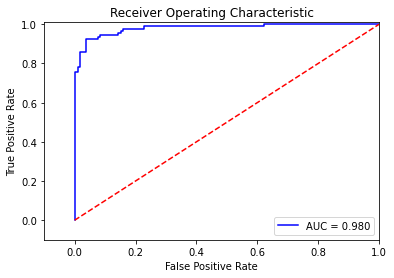

In [149]:
# ROC CURVE

y_pred_undersample_score = grid.fit(X_train_undersample,y_train_undersample.values.ravel()).decision_function(X_test_undersample.values)

fpr, tpr, thresholds = roc_curve(y_test_undersample.values.ravel(),y_pred_undersample_score)
roc_auc = auc(fpr, tpr)
print("AUC=",roc_auc)
# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [150]:
#Support Vector Machine

In [151]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC

In [152]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}
grid_svm = GridSearchCV(SVC(),param_grid,n_jobs=+1,cv=3)
grid_svm.fit(X_train_undersample,y_train_undersample.values.ravel())

GridSearchCV(cv=3, estimator=SVC(), n_jobs=1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [153]:
grid_svm.best_estimator_

SVC(C=100, gamma=0.001)

In [154]:
y_pred_undersample_svm = grid_svm.predict(X_test_undersample)
print('Accuracy Score',accuracy_score(y_test_undersample,y_pred_undersample_svm))

Accuracy Score 0.9441624365482234


The accuracy score  of SVM for undersample data is 0.9441624365482234


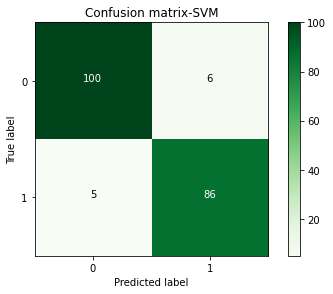

In [155]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample_svm)
np.set_printoptions(precision=2)

print('The accuracy score  of SVM for undersample data is {}'.format(accuracy_score(y_test_undersample,y_pred_undersample_svm)))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix-SVM')
plt.show()

In [156]:

print('In case of Undersampled data: ')
print(" ")
print('The accuracy of SVM is {}'.format(accuracy_score(y_test_undersample, y_pred_undersample_svm)))
print(" ")
print('Precision-->{}'.format(precision_score(y_test_undersample, y_pred_undersample_svm)))
print(" ")
print('F_1_Score -->{}'.format(f1_score(y_test_undersample, y_pred_undersample_svm)))
print(" ")
print('recall_Score -->{}'.format(recall_score(y_test_undersample, y_pred_undersample_svm)))
print(" ")
print('matthews_corrcoef -->{}'.format(matthews_corrcoef(y_test_undersample, y_pred_undersample_svm)))



In case of Undersampled data: 
 
The accuracy of SVM is 0.9441624365482234
 
Precision-->0.9347826086956522
 
F_1_Score -->0.9398907103825138
 
recall_Score -->0.945054945054945
 
matthews_corrcoef -->0.8878071328413852


The accuracy of logistic regression is 0.9729293213019206


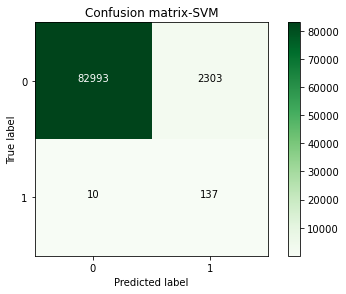

In [157]:
#On Whole Data
y_pred_svm = grid_svm.predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred_svm)
np.set_printoptions(precision=2)

log_score=(accuracy_score(y_test, y_pred_svm))
print('The accuracy of logistic regression is {}'.format(accuracy_score(y_test, y_pred_svm)))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix-SVM')
plt.show()

In [158]:

print('In case of whole data: ')
print(" ")
print('The accuracy of SVM is {}'.format(accuracy_score(y_test, y_pred_svm)))
print(" ")
print('Precision-->{}'.format(precision_score(y_test,y_pred_svm)))
print(" ")
print('F_1_Score -->{}'.format(f1_score(y_test,y_pred_svm)))
print(" ")
print('recall_Score -->{}'.format(recall_score(y_test,y_pred_svm)))
print(" ")
print('matthews_corrcoef -->{}'.format(matthews_corrcoef(y_test,y_pred_svm)))




In case of whole data: 
 
The accuracy of SVM is 0.9729293213019206
 
Precision-->0.05614754098360656
 
F_1_Score -->0.10591418631619638
 
recall_Score -->0.9319727891156463
 
matthews_corrcoef -->0.22517318354042365


AUC= 0.9798880364918101


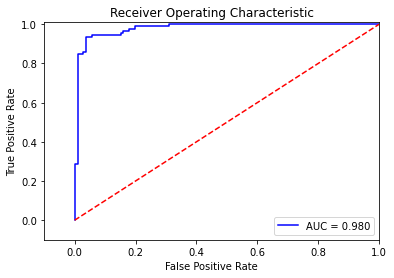

In [159]:
# ROC CURVE

y_pred_undersample_svm = grid_svm.fit(X_train_undersample,y_train_undersample.values.ravel()).decision_function(X_test_undersample.values)

fpr, tpr, thresholds = roc_curve(y_test_undersample.values.ravel(),y_pred_undersample_svm)
roc_auc = auc(fpr, tpr)
print("AUC=",roc_auc)
# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [160]:
#Naive Bayes

In [161]:
from sklearn.naive_bayes import GaussianNB
param_grid_nb = {'var_smoothing':np.logspace(0,-9,num=100)} 
              
grid_nb = GridSearchCV(GaussianNB(),param_grid_nb,n_jobs=+1,cv=3)
grid_nb.fit(X_train_undersample,y_train_undersample.values.ravel())


GridSearchCV(cv=3, estimator=GaussianNB(), n_jobs=1,
             param_grid={'var_smoothing': array([1.00e+00, 8.11e-01, 6.58e-01, 5.34e-01, 4.33e-01, 3.51e-01,
       2.85e-01, 2.31e-01, 1.87e-01, 1.52e-01, 1.23e-01, 1.00e-01,
       8.11e-02, 6.58e-02, 5.34e-02, 4.33e-02, 3.51e-02, 2.85e-02,
       2.31e-02, 1.87e-02, 1.52e-02, 1.23e-02, 1.00e-02, 8.11e-03,
       6.58e-03, 5.34e-03, 4.33e-03, 3.51e-03, 2.85e-03, 2.31...
       3.51e-06, 2.85e-06, 2.31e-06, 1.87e-06, 1.52e-06, 1.23e-06,
       1.00e-06, 8.11e-07, 6.58e-07, 5.34e-07, 4.33e-07, 3.51e-07,
       2.85e-07, 2.31e-07, 1.87e-07, 1.52e-07, 1.23e-07, 1.00e-07,
       8.11e-08, 6.58e-08, 5.34e-08, 4.33e-08, 3.51e-08, 2.85e-08,
       2.31e-08, 1.87e-08, 1.52e-08, 1.23e-08, 1.00e-08, 8.11e-09,
       6.58e-09, 5.34e-09, 4.33e-09, 3.51e-09, 2.85e-09, 2.31e-09,
       1.87e-09, 1.52e-09, 1.23e-09, 1.00e-09])})

In [162]:
grid_nb.best_estimator_

GaussianNB(var_smoothing=0.0015199110829529332)

In [163]:
y_pred_undersample_nb = grid_nb.predict(X_test_undersample)
print('Accuracy Score',accuracy_score(y_test_undersample,y_pred_undersample_nb))

Accuracy Score 0.8883248730964467


The accuracy score  of Naive Bayes for undersample data is 0.8883248730964467


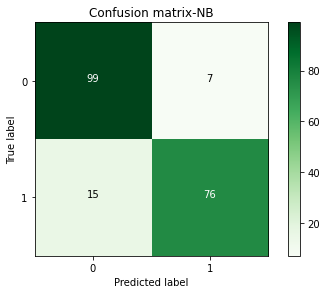

In [164]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample_nb)
np.set_printoptions(precision=2)

print('The accuracy score  of Naive Bayes for undersample data is {}'.format(accuracy_score(y_test_undersample,y_pred_undersample_nb)))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix-NB')
plt.show()

In [165]:
from sklearn.metrics import recall_score,f1_score,precision_score,classification_report,matthews_corrcoef


print('The accuracy of Naive Bayes is {}'.format(accuracy_score(y_test_undersample, y_pred_undersample_nb)))
print(" ")
print('Precision-->{}'.format(precision_score(y_test_undersample, y_pred_undersample_nb)))
print(" ")
print('F_1_Score -->{}'.format(f1_score(y_test_undersample, y_pred_undersample_nb)))
print(" ")
print('recall_Score -->{}'.format(recall_score(y_test_undersample, y_pred_undersample_nb)))
print(" ")
print('matthews_corrcoef -->{}'.format(matthews_corrcoef(y_test_undersample, y_pred_undersample_nb)))



The accuracy of Naive Bayes is 0.8883248730964467
 
Precision-->0.9156626506024096
 
F_1_Score -->0.8735632183908046
 
recall_Score -->0.8351648351648352
 
matthews_corrcoef -->0.7765693943809088


The accuracy of NB is 0.9654272438935899


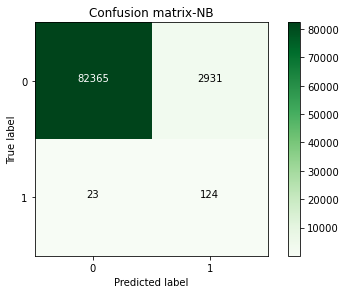

In [166]:
#On Whole Data
y_pred_nb = grid_nb.predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred_nb)
np.set_printoptions(precision=2)

log_score=(accuracy_score(y_test, y_pred_nb))
print('The accuracy of NB is {}'.format(accuracy_score(y_test, y_pred_nb)))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix-NB')
plt.show()

In [167]:
from sklearn.metrics import recall_score,f1_score,precision_score,classification_report,matthews_corrcoef



print('The accuracy of Naive Bayes is {}'.format(accuracy_score(y_test, y_pred_nb)))
print(" ")
print('Precision-->{}'.format(precision_score(y_test,y_pred_nb)))
print(" ")
print('F_1_Score -->{}'.format(f1_score(y_test,y_pred_nb)))
print(" ")
print('recall_Score -->{}'.format(recall_score(y_test,y_pred_nb)))
print(" ")
print('matthews_corrcoef -->{}'.format(matthews_corrcoef(y_test,y_pred_nb)))




The accuracy of Naive Bayes is 0.9654272438935899
 
Precision-->0.040589198036006545
 
F_1_Score -->0.07745159275452843
 
recall_Score -->0.8435374149659864
 
matthews_corrcoef -->0.18060414830759833


AUC= 0.9483723823346465


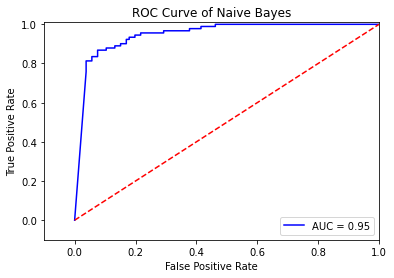

In [168]:
# ROC CURVE

y_pred_undersample_nb = grid_nb.fit(X_train_undersample,y_train_undersample.values.ravel())

y_scores = grid_nb.predict_proba(X_test_undersample)
fpr, tpr, threshold = roc_curve(y_test_undersample, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
print("AUC=",roc_auc)



plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Naive Bayes')
plt.show()

In [169]:
#K Nearest Neighbor Classifier



In [170]:
param_grid_knn = {
    'n_neighbors':[3,5,7,11,19],
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan']
} 
              
grid_knn = GridSearchCV(KNeighborsClassifier(),param_grid_knn,n_jobs=+1,cv=3)
grid_knn.fit(X_train_undersample,y_train_undersample.values.ravel())


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 11, 19],
                         'weights': ['uniform', 'distance']})

In [171]:
grid_knn.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [172]:
y_pred_undersample_knn = grid_knn.predict(X_test_undersample)
print('Accuracy Score',accuracy_score(y_test_undersample,y_pred_undersample_knn))

Accuracy Score 0.9238578680203046


The accuracy score  of KNN for undersample data is 0.9238578680203046


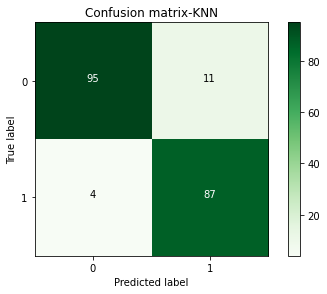

In [173]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample_knn)
np.set_printoptions(precision=2)

print('The accuracy score  of KNN for undersample data is {}'.format(accuracy_score(y_test_undersample,y_pred_undersample_knn)))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix-KNN')
plt.show()

In [174]:
from sklearn.metrics import recall_score,f1_score,precision_score,classification_report,matthews_corrcoef

print('Accuracy -->{}'.format(accuracy_score(y_test_undersample,y_pred_undersample_knn)))
print(" ")
print('Precision-->{}'.format(precision_score(y_test_undersample,y_pred_undersample_knn)))
print(" ")
print('Recall-->{}'.format(recall_score(y_test_undersample, y_pred_undersample_knn)))
print(" ")
print('F_1_Score -->{}'.format(f1_score(y_test_undersample,y_pred_undersample_knn)))
print(" ")
print('matthews_corrcoef -->{}'.format(matthews_corrcoef(y_test_undersample, y_pred_undersample_knn)))

Accuracy -->0.9238578680203046
 
Precision-->0.8877551020408163
 
Recall-->0.9560439560439561
 
F_1_Score -->0.9206349206349207
 
matthews_corrcoef -->0.849807156821831


The accuracy of KNN is 0.9597509450744941


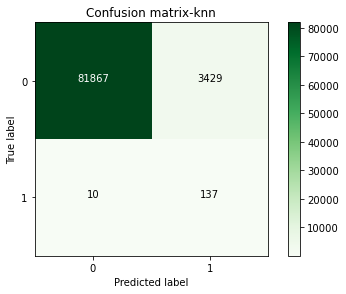

In [175]:
#On Whole Data
y_pred_knn = grid_knn.predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred_knn)
np.set_printoptions(precision=2)

log_score=(accuracy_score(y_test, y_pred_knn))
print('The accuracy of KNN is {}'.format(accuracy_score(y_test, y_pred_knn)))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix-knn')
plt.show()

In [176]:


print('Accuracy -->{}'.format(accuracy_score(y_test,y_pred_knn)))
print(" ")
print('Precision-->{}'.format(precision_score(y_test,y_pred_knn)))
print(" ")
print('Recall-->{}'.format(recall_score(y_test,y_pred_knn)))
print(" ")
print('F_1_Score -->{}'.format(f1_score(y_test,y_pred_knn)))
print(" ")
print('matthews_corrcoef -->{}'.format(matthews_corrcoef(y_test, y_pred_knn)))



Accuracy -->0.9597509450744941
 
Precision-->0.03841839596186203
 
Recall-->0.9319727891156463
 
F_1_Score -->0.0737947751144627
 
matthews_corrcoef -->0.18480129520544344


AUC= 0.9647522289031724


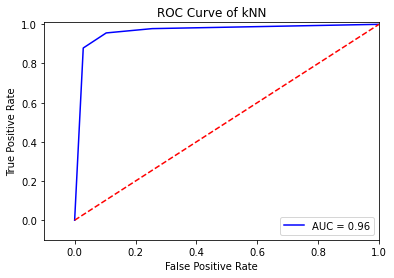

In [177]:
# ROC CURVE

grid_knn.fit(X_train_undersample,y_train_undersample.values.ravel())
y_scores = grid_knn.predict_proba(X_test_undersample)
fpr, tpr, threshold = roc_curve(y_test_undersample, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
print("AUC=",roc_auc)



plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

In [178]:
#MLP Classifier

In [179]:

from sklearn.neural_network import MLPClassifier
clf=MLPClassifier()
param_grid_mlp = {
    'hidden_layer_sizes': [(50,50), (100,50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [180]:
from sklearn.model_selection import GridSearchCV
gridsearchcv = GridSearchCV(clf, param_grid_mlp, n_jobs=-1, cv=3)
gscv=gridsearchcv.fit(X_train_undersample, y_train_undersample.values.ravel())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [181]:
gridsearchcv.best_estimator_

MLPClassifier(hidden_layer_sizes=(100, 50), learning_rate='adaptive',
              solver='sgd')

In [182]:
y_pred_undersample_mlp = gridsearchcv.predict(X_test_undersample)
print('Accuracy Score',accuracy_score(y_test_undersample,y_pred_undersample_mlp))

Accuracy Score 0.934010152284264


The accuracy score  of MLP for undersample data is 0.934010152284264


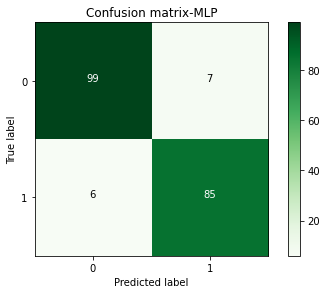

In [183]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample_mlp)
np.set_printoptions(precision=2)

print('The accuracy score  of MLP for undersample data is {}'.format(accuracy_score(y_test_undersample,y_pred_undersample_mlp)))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix-MLP')
plt.show()

In [184]:
from sklearn.metrics import recall_score,f1_score,precision_score,classification_report,matthews_corrcoef

print('Accuracy -->{}'.format(accuracy_score(y_test_undersample,y_pred_undersample_mlp)))
print(" ")
print('Precision-->{}'.format(precision_score(y_test_undersample,y_pred_undersample_mlp)))
print(" ")
print('Recall-->{}'.format(recall_score(y_test_undersample, y_pred_undersample_mlp)))
print(" ")
print('F_1_Score -->{}'.format(f1_score(y_test_undersample,y_pred_undersample_mlp)))
print(" ")
print('matthews_corrcoef -->{}'.format(matthews_corrcoef(y_test_undersample, y_pred_undersample_mlp)))

Accuracy -->0.934010152284264
 
Precision-->0.9239130434782609
 
Recall-->0.9340659340659341
 
F_1_Score -->0.9289617486338797
 
matthews_corrcoef -->0.8673989642101423


The accuracy of MLP is 0.9743220626616574


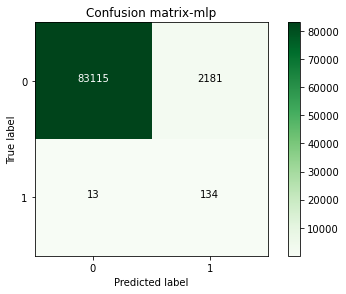

In [185]:
#On Whole Data
y_pred_mlp = gridsearchcv.predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred_mlp)
np.set_printoptions(precision=2)

log_score=(accuracy_score(y_test, y_pred_mlp))
print('The accuracy of MLP is {}'.format(accuracy_score(y_test, y_pred_mlp)))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix-mlp')
plt.show()

In [186]:

print('Accuracy -->{}'.format(accuracy_score(y_test,y_pred_mlp)))
print(" ")
print('Precision-->{}'.format(precision_score(y_test,y_pred_mlp)))
print(" ")
print('Recall-->{}'.format(recall_score(y_test,y_pred_mlp)))
print(" ")
print('F_1_Score -->{}'.format(f1_score(y_test,y_pred_mlp)))
print(" ")
print('matthews_corrcoef -->{}'.format(matthews_corrcoef(y_test, y_pred_mlp)))



Accuracy -->0.9743220626616574
 
Precision-->0.057883369330453564
 
Recall-->0.9115646258503401
 
F_1_Score -->0.10885458976441918
 
matthews_corrcoef -->0.22615439473351695


AUC= 0.9737715115073605


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


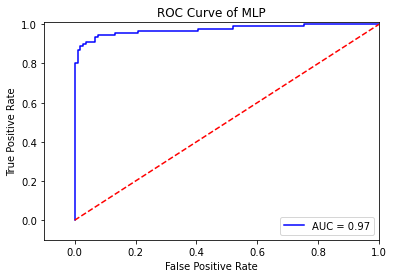

In [187]:
# ROC CURVE

gridsearchcv.fit(X_train_undersample,y_train_undersample.values.ravel())
y_scores = gridsearchcv.predict_proba(X_test_undersample)
fpr, tpr, threshold = roc_curve(y_test_undersample, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
print("AUC=",roc_auc)



plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of MLP')
plt.show()

In [188]:
#Voting Ensemble

from sklearn.ensemble import RandomForestClassifier,VotingClassifier

rf = RandomForestClassifier(max_features = 'log2', n_estimators = 103, min_samples_leaf = 50, criterion = 'gini', random_state = 12)

ensemble = VotingClassifier(estimators = [('rf',RandomForestClassifier() ), ('lr', LogisticRegression()),('knn', KNeighborsClassifier()), ('svc', SVC()),('nb',GaussianNB()),('mlp',MLPClassifier())], voting = 'hard')

In [189]:
''' Voting Ensemble

from sklearn.ensemble import RandomForestClassifier,VotingClassifier

rf = RandomForestClassifier(max_features = 'log2', n_estimators = 103, min_samples_leaf = 50, criterion = 'gini', random_state = 12)

ensemble = VotingClassifier(estimators = [('rf',RandomForestClassifier() ), ('lr', LogisticRegression()),('knn', KNeighborsClassifier()), ('svc', SVC()),('nb',GaussianNB())], voting = 'hard')'''

" Voting Ensemble\n\nfrom sklearn.ensemble import RandomForestClassifier,VotingClassifier\n\nrf = RandomForestClassifier(max_features = 'log2', n_estimators = 103, min_samples_leaf = 50, criterion = 'gini', random_state = 12)\n\nensemble = VotingClassifier(estimators = [('rf',RandomForestClassifier() ), ('lr', LogisticRegression()),('knn', KNeighborsClassifier()), ('svc', SVC()),('nb',GaussianNB())], voting = 'hard')"

In [190]:
ensemble_pred = ensemble.fit(X_train_undersample,y_train_undersample.values.ravel()).predict(X_test.values)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [191]:
ensemble_score=accuracy_score(y_test, ensemble_pred)
print('The accuracy of Voting Ensemble is {}'.format(accuracy_score(y_test, ensemble_pred)))

print(" ")
print('Precision-->{}'.format(precision_score(y_test,ensemble_pred)))
print(" ")
print('F_1_Score -->{}'.format(f1_score(y_test,ensemble_pred)))
print(" ")
print('recall_Score -->{}'.format(recall_score(y_test,ensemble_pred)))
print(" ")
print('matthews_corrcoef -->{}'.format(matthews_corrcoef(y_test,ensemble_pred)))

prec_score_3=(precision_score(y_test,ensemble_pred))




The accuracy of Voting Ensemble is 0.9812974731692473
 
Precision-->0.07746068724519511
 
F_1_Score -->0.1427038626609442
 
recall_Score -->0.9047619047619048
 
matthews_corrcoef -->0.2617189402514903


In [192]:
# Make Comparison
log_score=(accuracy_score(y_test, y_pred_log))
nb_score=(accuracy_score(y_test, y_pred_nb))
svc_score=(accuracy_score(y_test, y_pred_svm))
knn_score=(accuracy_score(y_test, y_pred_knn))
mlp_score=(accuracy_score(y_test, y_pred_mlp))
ensemble_score=accuracy_score(y_test, ensemble_pred)

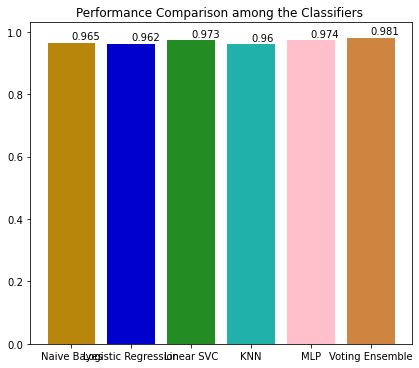

In [193]:
## Comparison


import numpy as np
import matplotlib.pyplot as plt
 
height = [round(nb_score,3),round(log_score,3),round(svc_score,3),round(knn_score,3),round(mlp_score,3), round(ensemble_score,3)]
bars = ('Naive Bayes','Logistic Regression','Linear SVC','KNN','MLP','Voting Ensemble')
fig, ax = plt.subplots(figsize = (6,5))
ax.bar(2,height=0.5,width=0.3)
y_pos = np.arange(len(bars))
label= [nb_score, log_score,svc_score,knn_score, ensemble_score]
log_score
plt.bar(y_pos, height, color=['darkgoldenrod','mediumblue','forestgreen' ,'lightseagreen','pink','peru'])
plt.xticks(y_pos, bars)
for index,data in enumerate(height):
    plt.text(x=index , y =data+0.01 , s=f"{data}" , fontdict=dict(fontsize=10))
plt.tight_layout()
plt.title('Performance Comparison among the Classifiers ')
plt.show()